In [35]:
import tensorflow as tf

model_version = 2
model_path = f'C:/New folder/VScode/python/potato-disease-classification/models/2.keras'
model = tf.keras.models.load_model(model_path)


In [37]:
from class_names import class_names

# Now you can use class_names in your notebook
print(class_names)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [38]:
from tensorflow.keras.preprocessing import image
import numpy as np

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch dimension
    img_array = img_array / 255.0  # Rescale to [0,1]
    return img_array


In [39]:
def predict_image(model, img_path, class_names):
    img_array = preprocess_image(img_path)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

# Example usage
img_path = r'potato\late1.JPG'
predicted_class, confidence = predict_image(model, img_path, class_names)

print(f"Predicted class: {predicted_class} with confidence: {confidence}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
Predicted class: Potato___Late_blight with confidence: 44.87%


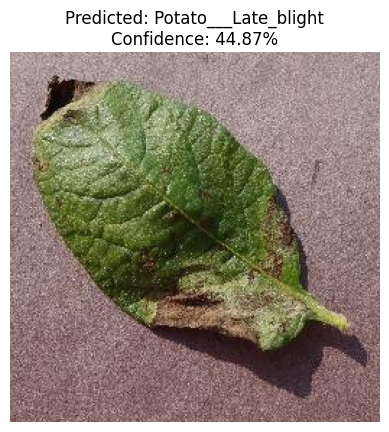

In [40]:
import matplotlib.pyplot as plt

def visualize_prediction(img_path, predicted_class, confidence):
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}\nConfidence: {confidence:.2f}%")
    plt.axis("off")
    plt.show()

# Example usage
visualize_prediction(img_path, predicted_class, confidence)


In [34]:
def preprocess_images(img_paths):
    images = []
    for img_path in img_paths:
        img_array = preprocess_image(img_path)
        images.append(img_array)
    return np.vstack(images)

def predict_images(model, img_paths, class_names):
    img_arrays = preprocess_images(img_paths)
    predictions = model.predict(img_arrays)
    results = []
    for i, prediction in enumerate(predictions):
        predicted_class = class_names[np.argmax(prediction)]
        confidence = round(100 * (np.max(prediction)), 2)
        results.append((img_paths[i], predicted_class, confidence))
    return results

# Example usage
img_paths = [r'Potato_dataset\Potato___Late_blight\0b092cda-db8c-489d-8c46-23ac3835310d___RS_LB 4480.JPG', r'Potato_dataset/Potato___healthy/0be9d721-82f5-42c3-b535-7494afe01dbe___RS_HL 1814.JPG']  # Replace with paths to your images
results = predict_images(model, img_paths, class_names)

for img_path, predicted_class, confidence in results:
    print(f"Image: {img_path} - Predicted class: {predicted_class} with confidence: {confidence}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
Image: Potato_dataset\Potato___Late_blight\0b092cda-db8c-489d-8c46-23ac3835310d___RS_LB 4480.JPG - Predicted class: Potato___healthy with confidence: 44.87%
Image: Potato_dataset/Potato___healthy/0be9d721-82f5-42c3-b535-7494afe01dbe___RS_HL 1814.JPG - Predicted class: Potato___healthy with confidence: 43.74%
